In [1]:
import pandas as pd

In [3]:
df= pd.read_csv("../models/study_1/compiled_results.csv")

In [12]:
df.columns

Index(['Unnamed: 0', 'dataset', 'seq_len', 'num_heads', 'model_dim', 'dropout',
       'img_backbone_trainable', 'img_size', 'img_backbone',
       'intermediate_size', 'capts_per_img', 'num_encoder_blocks',
       'num_decoder_blocks', 'max_epochs', 'learning_rate', 'metric',
       'normalization', 'vocab_size', 'core_modality_f1_w', 'plane_f1_w',
       'anatomy_f1_w', 'bleu', 'mp1', 'mp2', 'mp3', 'mp4', 'bp',
       'rouge1_f_low', 'rouge1_f_mid', 'rouge1_f_high', 'rouge2_f_low',
       'rouge2_f_mid', 'rouge2_f_high', 'rougeL_f_low', 'rougeL_f_mid',
       'rougeL_f_high'],
      dtype='object')

In [22]:
f1_df=df.loc[4,['core_modality_f1_w', 'plane_f1_w',
       'anatomy_f1_w']].reset_index()

In [51]:
f1_df

,Category,F1 weighted score
0,core_modality_f1_w,0.915382
1,plane_f1_w,0.701626
2,anatomy_f1_w,0.595948


In [64]:
f1_df.rename(columns={'index':'Category',4:'F1 weighted score'}, inplace=True)
f1_df.replace('core_modality_f1_w', 'Modality',inplace=True)
f1_df.replace('plane_f1_w', 'Plane',inplace=True)
f1_df.replace('anatomy_f1_w', 'Anatomy',inplace=True)

In [67]:
latex_table=f1_df.to_latex(index=False,
                 caption='F1 scores for extracted labels',
                 label='tab: f1_scores',
                 bold_rows=True,
                 # column_format='lr',
                 # float_format="%.0f",
                 na_rep='-')

In [68]:
print(latex_table)

\begin{table}
\centering
\caption{F1 scores for extracted labels}
\label{tab: f1_scores}
\begin{tabular}{lr}
\toprule
Category &  F1 weighted score \\
\midrule
Modality &           0.915382 \\
   Plane &           0.701626 \\
 Anatomy &           0.595948 \\
\bottomrule
\end{tabular}
\end{table}



In [62]:
f1_df

,Category,F1 weighted score
0,Modality,0.915382
1,Plane,0.701626
2,Anatomy,0.595948


In [70]:
d={
    "dataset": [
        "medpix"
    ],
    "seq_len": [
        178
    ],
    "num_heads": [
        16,
        8,
        4
    ],
    "model_dim": [
        512,
        256,
        128
    ],
    "dropout": [
        0.2,
        0.4,
        0.6
    ],
    "img_backbone_trainable": [
        False
    ],
    "img_size": [
        [
            299,
            299,
            3
        ]
    ],
    "img_backbone": [
        "efficientnetb0"
    ],
    "intermediate_size": [
        2048
    ],
    "capts_per_img": [
        1
    ],
    "num_encoder_blocks": [
        3
    ],
    "num_decoder_blocks": [
        3
    ],
    "max_epochs": [
        100
    ],
    "learning_rate": [
        0.001
    ],
    "metric": [
        "val_acc"
    ],
    "normalization": [
        "pre"
    ]}

In [74]:
params=list(d.keys())

In [77]:
default_values = [d[param][0] for param in params]

In [79]:
explored_values = [d[param][1:] for param in params]

In [86]:
ablation_df=pd.DataFrame({'parameter name':params,
              'default values':default_values,
              'explored values':explored_values})


In [100]:
mask = ablation_df['explored values'].apply(lambda x: x == [])

# Filter the DataFrame using the mask
result = ablation_df[mask]

In [107]:
mask

0      True
1      True
2     False
3     False
4     False
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
Name: explored values, dtype: bool

In [110]:
ablation_df

,parameter name,default values,explored values
0,dataset,medpix,[]
1,seq_len,178,[]
2,num_heads,16,"[8, 4]"
3,model_dim,512,"[256, 128]"
4,dropout,0.2,"[0.4, 0.6]"
5,img_backbone_trainable,False,[]
6,img_size,"[299, 299, 3]",[]
7,img_backbone,efficientnetb0,[]
8,intermediate_size,2048,[]
9,capts_per_img,1,[]


In [113]:
ablation_latex=ablation_df.loc[~mask].to_latex(index=False,
                 caption='F1 scores for extracted labels',
                 label='tab: f1_scores',
                 bold_rows=True,
                 # column_format='lr',
                 # float_format="%.0f",
)

In [114]:
print(ablation_latex)

\begin{table}
\centering
\caption{F1 scores for extracted labels}
\label{tab: f1_scores}
\begin{tabular}{lll}
\toprule
parameter name & default values & explored values \\
\midrule
     num\_heads &             16 &          [8, 4] \\
     model\_dim &            512 &      [256, 128] \\
       dropout &            0.2 &      [0.4, 0.6] \\
\bottomrule
\end{tabular}
\end{table}



In [280]:
ab_results_df= pd.read_csv('../models/study_2/compiled_results.csv')
renamings={
    'dataset': 'Dataset',
    'num_heads': 'Attention heads',
    'model_dim': 'Model dimension',
    'core_modality_f1_w': 'Modality F1w', 
    'plane_f1_w': 'Plane F1w',
    'anatomy_f1_w':'Anatomy F1w', 
    'bleu':'BLEU-4',
    'rougeL_f_mid':'Rouge-L'

}
ab_table=ab_results_df.rename(columns=renamings)

In [281]:
ab_table.loc[5,'Dataset']='COCO Captions'
# ab_table.loc[6,'Dataset']='COCO Captions'
# ab_table.loc[7,'Dataset']='COCO Captions'
# ab_table.loc[8,'Dataset']='COCO Captions'

ab_table.loc[5,'Attention heads']=16
ab_table.loc[5,'Model dimension']=512
ab_table.loc[5,'BLEU-4']=26.78
ab_table.loc[5,'Rouge-L']=.2112

# ab_table.loc[7,'BLEU-4']=16.7

# ab_table.loc[6,'BLEU-4']=26.4


# ab_table['Model']=['Ours']*6+['CapDec','VLKD']
ab_table.replace('medpix','Medpix', inplace=True)
cols=[
    # 'Model',
    'Dataset',
      'Attention heads', 
      'Model dimension', 'Modality F1w', 
      'Plane F1w', 'Anatomy F1w',
      'BLEU-4', 'Rouge-L']


In [282]:
ab_table=ab_table[cols]
ab_table['Rouge-L']=ab_table['Rouge-L']*100
ab_table

,Dataset,Attention heads,Model dimension,Modality F1w,Plane F1w,Anatomy F1w,BLEU-4,Rouge-L
0,Medpix,16.0,512.0,0.923994,0.746223,0.652002,38.375324,45.929453
1,Medpix,8.0,512.0,0.925157,0.740391,0.628541,37.742946,45.160067
2,Medpix,4.0,512.0,0.930470,0.728642,0.626664,38.118636,45.282635
3,Medpix,16.0,256.0,0.936576,0.730867,0.662660,38.208840,46.294130
4,Medpix,16.0,128.0,0.916893,0.723537,0.605354,36.282100,42.829835
5,COCO Captions,16.0,512.0,NaN,NaN,NaN,26.780000,21.120000


In [283]:
ab_results_latex=ab_table.to_latex(index=False,
                 caption='Ablation study results',
                 label='tab:ablation_results',
                 bold_rows=True,
                 float_format="%.2f",
                 na_rep='-')
                 # column_format='lr',
                 # float_format="%.2f",

In [284]:
print(ab_results_latex)

\begin{table}
\centering
\caption{Ablation study results}
\label{tab:ablation_results}
\begin{tabular}{lrrrrrrr}
\toprule
      Dataset &  Attention heads &  Model dimension &  Modality F1w &  Plane F1w &  Anatomy F1w &  BLEU-4 &  Rouge-L \\
\midrule
       Medpix &            16.00 &           512.00 &          0.92 &       0.75 &         0.65 &   38.38 &    45.93 \\
       Medpix &             8.00 &           512.00 &          0.93 &       0.74 &         0.63 &   37.74 &    45.16 \\
       Medpix &             4.00 &           512.00 &          0.93 &       0.73 &         0.63 &   38.12 &    45.28 \\
       Medpix &            16.00 &           256.00 &          0.94 &       0.73 &         0.66 &   38.21 &    46.29 \\
       Medpix &            16.00 &           128.00 &          0.92 &       0.72 &         0.61 &   36.28 &    42.83 \\
COCO Captions &            16.00 &           512.00 &             - &          - &            - &   26.78 &    21.12 \\
\bottomrule
\end{tabular}
\en

In [286]:
df=pd.read_csv('../models/study_2/0/0_test_labels.csv')

In [289]:
df.columns

Index(['Unnamed: 0', 'image', 'predicted_caption', 'true_caption_1',
       'true_core_modality', 'true_plane', 'true_anatomy',
       'predicted_core_modality', 'predicted_plane', 'predicted_anatomy'],
      dtype='object')

['ct', 'mr', 'xr', 'us', 'an', 'pet/nm', 'bas', 'int', 'ugi', 'gr', 'he']

In [359]:
def plot_conf_matrix(y_true,y_pred,
                     color,save_path,
                     concept):
    labels= y_true.unique()
    cm=confusion_matrix(y_true,y_pred,labels=labels)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
    disp.plot(cmap=sns.light_palette(color, reverse=False, as_cmap=True))
    plt.xlabel('Predicted '+concept)
    plt.ylabel('True'+concept)
    plt.xticks(rotation = 90)
    disp.figure_.savefig(save_path,dpi=200,bbox_inches='tight')

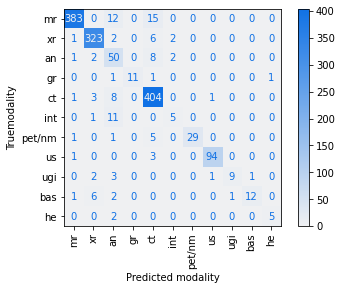

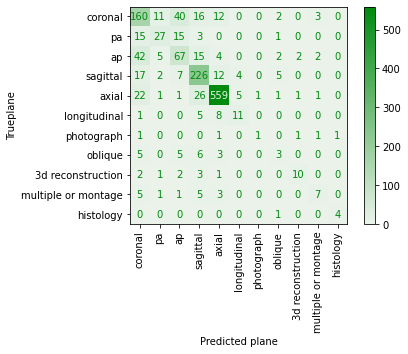

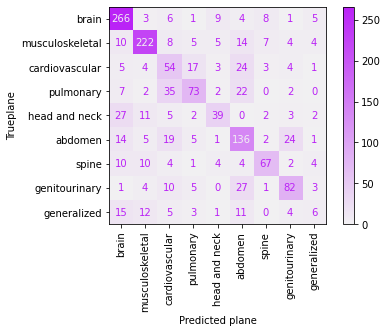

In [369]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
# For core modality
y_true = df['true_core_modality']
y_pred = df['predicted_core_modality']
color="#1071e5"
plot_conf_matrix(y_true,y_pred,
                 color,save_path='cm_cm.png',
                 concept = 'modality'
                )
# For plane
y_true = df['true_plane']
y_pred = df['predicted_plane']
color="#008a0e"
plot_conf_matrix(y_true,y_pred,
                 color,save_path='cm_pl.png',
                 concept = 'plane'
                )

# For anatomy
y_true = df['true_anatomy']
y_pred = df['predicted_anatomy']
color="#ba23f6"
plot_conf_matrix(y_true,y_pred,
                 color,save_path='cm_an.png',
                 concept = 'plane'
                )



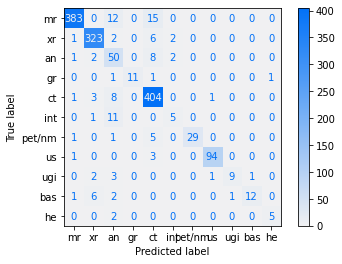

In [317]:
disp.figure_.savefig()